In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imutils import paths
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, SimpleRNN, Dropout,Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add
from tensorflow.keras import Sequential
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, SimpleRNN, Dropout,Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add
from tensorflow.keras import Sequential
import arabic_reshaper
import bidi.algorithm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import re
from hazm import Normalizer, word_tokenize

import torch
from torch.utils.data import DataLoader
from torch import nn, optim

import transformers
from transformers import AutoModel, AutoTokenizer, AutoConfig

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import nltk
# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten , Activation, SimpleRNN, LSTM, GRU, Dropout, TimeDistributed, Reshape, Input, Lambda, Add
from tabulate import tabulate

In [5]:

df = pd.concat([pd.read_csv('/kaggle/input/final1/final1.csv', header=None,  skiprows = 1),\
                pd.read_csv('/kaggle/input/covid2/covid2.csv', header=None,  skiprows = 1)], ignore_index=True)
#df = pd.read_csv("/kaggle/input/final1/final1.csv", header=None,  skiprows = 1)   

pd.set_option('display.max_colwidth', -1)
df = df[[1,6]]
df.drop(df.index[0])
df.columns = ['Text','sentiment']
df.head()
display(df.head())

,Text,sentiment
0,@Gandalfkhaki ویروس عرفانی کرونا میخوره تو صورتشون 👏,1
1,خوبی کرونا که یک ویروس کشنده است اینه که شما اگر گرفتی ، فردا یا پس فردا یا نهایتا دو هفته بعد میفهمی,1
2,از سوپ آمده تا پیتزا یا خمیر دندان فرقی نداره ولی کلا کرونا ویروس کشنده است,1
3,همانطور که جامعه جهانی اجماع کردن و جلوی ویروس #کرونا رو گرفتن با #اتحاد باید جلوی ویروس منحوسی بنام #سپاه رو هم بگیرد,1
4,. طراحی ویروس کرونا برای ژن ایرانی,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426 entries, 0 to 2425
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2426 non-null   object
 1   sentiment  2426 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


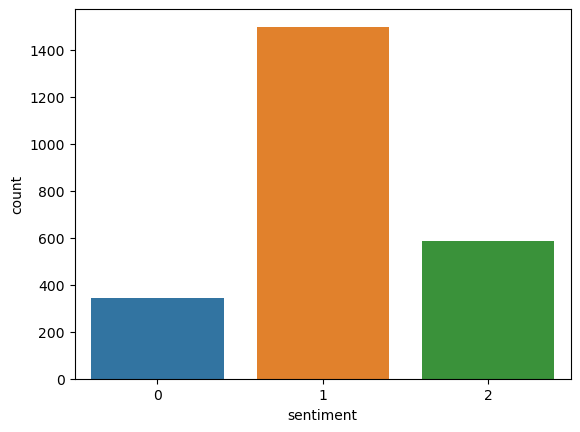

In [6]:
df.shape
df.tail(20)
sns.countplot(x=df['sentiment']);

df.info()



In [7]:


e = ("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002500-\U00002BEF"  # chinese char
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642" 
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"  # dingbats
    u"\u3030"
     "]+")
allemojies = set()
#حذف ایموجی ،
def removeEmojies(text):
    duplemoj = re.compile('(' + e + '){2,}|((' + e + r')\s+)' '{2,}', re.UNICODE)
    return duplemoj.sub('', text)
punctuation = "?.؟!،,"
normalizer = Normalizer()
#تعریف پریپروسس ،
def preprocessing(item):
    output = normalizer.normalize(item)
    output = output.replace("\_", "\u200c")
#     output = output.replace("\u200c", "")
    output = re.sub(r"LINK([^ ])*|TAG|ID|\-|@|LINK|[A-Za-z]", "", output)
    for i in punctuation:
        p = "\\" + i + "{2,}"
        output = re.sub(p, i, output)
#     output = re.sub("\?|\.|\؟|\!|\،|\,", "", output)
    output = removeEmojies(output)
    emoj = re.compile(e)
    for i in emoj.findall(output):
        allemojies.add(i)
    output = re.sub("\s+", " ", output).strip()
    return output
# پریپروسس متن
df['Text'] = df['Text'].apply(preprocessing)
# نمایش تعداد کلمات در هر رکورد
df['len words'] = df['Text'].apply(lambda x: len(word_tokenize(x)))
# نمایش تعدادکاراکتر در هر رکورد
df['len chars'] = df['Text'].apply(lambda x: len(x))
comments = df[df['len chars'] >= 3].reset_index(drop=True)
# محاسبه بیشترین طول کلمات در هر توییت
maxlen = comments['len words'].max()
print(maxlen)
#نمایش 5 رکورد دیتاست همراه با 3 ستون تعداد  کلمات، تعداد کاراکتر 
display(df.head(5))


153


,Text,sentiment,len words,len chars
0,ویروس عرفانی کرونا میخوره تو صورتشون 👏,1,7,38
1,خوبی کرونا که یک ویروس کشنده است اینه که شما اگر گرفتی، فردا یا پس فردا یا نهایتا دو هفته بعد میفهمی,1,23,100
2,از سوپ آمده تا پیتزا یا خمیر دندان فرقی نداره ولی کلا کرونا ویروس کشنده است,1,16,75
3,همانطور که جامعه جهانی اجماع کردن و جلوی ویروس #کرونا رو گرفتن با #اتحاد باید جلوی ویروس منحوسی بنام #سپاه رو هم بگیرد,1,23,118
4,. طراحی ویروس کرونا برای ژن ایرانی,0,7,34


In [9]:
!pip install wordcloud-fa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 2.5 MB/s eta 0:00:00


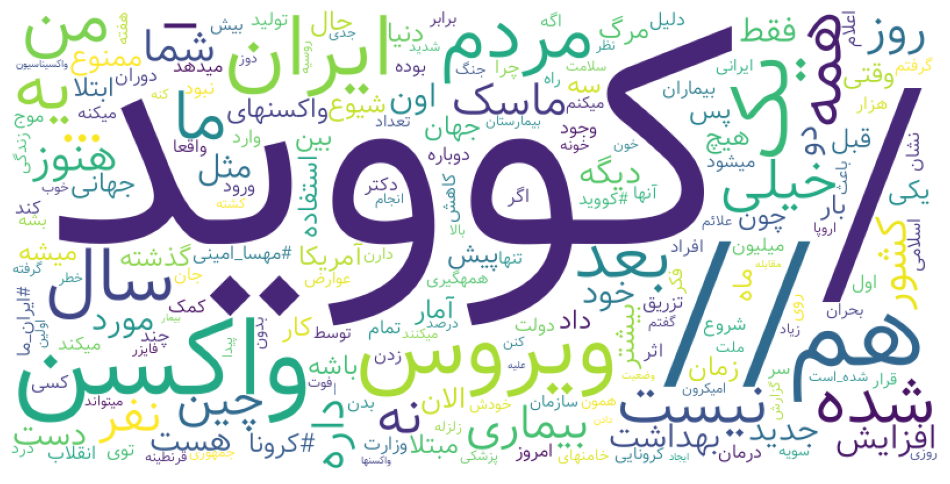

In [10]:


def removeWeirdChars(text):
    weirdPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weirdPatterns.sub(r'', text)
#حذف کاراکترها از متن
df['Text'] = df['Text'].apply(removeWeirdChars)
#تبدیل به string
text = df['Text'].to_string().lower() 
 

#ایجادwordcloud 
from wordcloud_fa import WordCloudFa

wodcloud = WordCloudFa(no_reshape=False,background_color='white', persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)


wc = wodcloud.generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis("off")
plt.show()
#متغییرحذف باقیمانده ایموجی ها
def remove_emoji(text):
    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
#حذف باقیمانده ایموجی ها
df['Text'] = df['Text'].apply(remove_emoji)


In [11]:

X = df['Text']
X

X.tail()
#تعیین تعداد کلاس ها
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()
print(num_classes)
y 
print(y)

3
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 0 1]
 [0 1 0]]


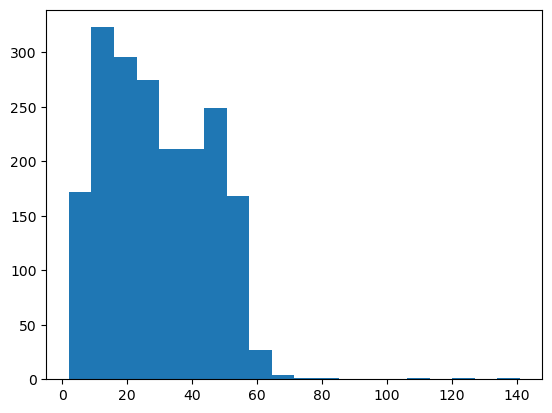

vocab_size 10740
X_train.shape (1941, 153) X_test.shape (485, 153)


In [13]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 20)
plt.show()
vocab_size = len(tokenizer.word_index)+1
print("vocab_size",vocab_size)

from keras.preprocessing import sequence

X_train = keras.utils.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.utils.pad_sequences(X_test, maxlen=maxlen)
print("X_train.shape",X_train.shape,"X_test.shape",X_test.shape)


In [15]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=4, batch_size=32, verbose=1,callbacks=[annealer, checkpoint])


Epoch 1/4
61/61 [==============================] - ETA: 0s - loss: 0.9740 - accuracy: 0.5837
Epoch 1: val_loss improved from inf to 0.80182, saving model to model.h5
61/61 [==============================] - 23s 193ms/step - loss: 0.9740 - accuracy: 0.5837 - val_loss: 0.8018 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 2/4
61/61 [==============================] - ETA: 0s - loss: 0.9043 - accuracy: 0.6043
Epoch 2: val_loss improved from 0.80182 to 0.63338, saving model to model.h5
61/61 [==============================] - 9s 153ms/step - loss: 0.9043 - accuracy: 0.6043 - val_loss: 0.6334 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 3/4
61/61 [==============================] - ETA: 0s - loss: 0.6476 - accuracy: 0.6965
Epoch 3: val_loss improved from 0.63338 to 0.37796, saving model to model.h5
61/61 [==============================] - 4s 73ms/step - loss: 0.6476 - accuracy: 0.6965 - val_loss: 0.3780 - val_accuracy: 0.8660 - lr: 0.0010
Epoch 4/4
61/61 [==============================] - ETA: 0s - l

16/16 [==============================] - 0s 10ms/step - loss: 0.1965 - accuracy: 0.9423
Final Loss: 0.19653934240341187, Final Accuracy: 0.9422680139541626
16/16 [==============================] - 0s 6ms/step
accuracy: 0.9422680412371134
Accuracy: 0.9422680412371134
Precision: 0.9116777084643036
Recall: 0.852174283523163
F1: 0.873237047017998
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        34
           1       0.98      0.97      0.98       342
           2       0.84      0.94      0.88       109

    accuracy                           0.94       485
   macro avg       0.91      0.85      0.87       485
weighted avg       0.94      0.94      0.94       485



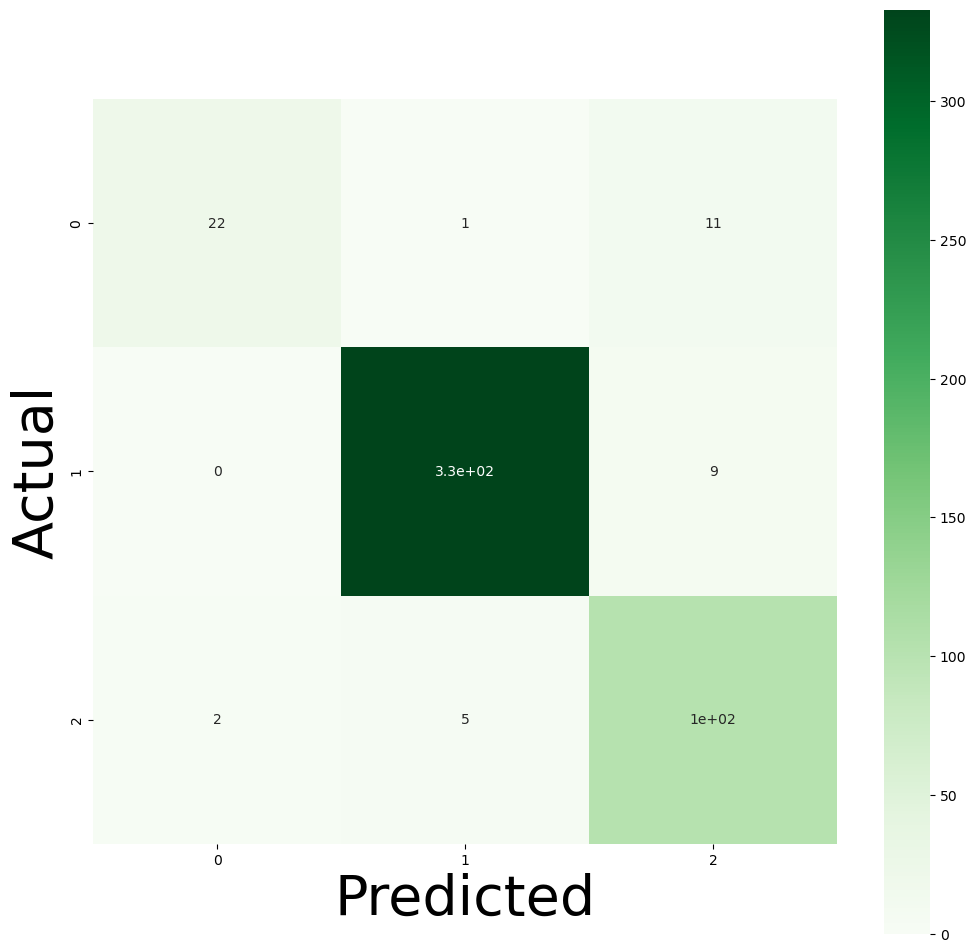

In [16]:
from sklearn.metrics import classification_report,roc_auc_score,average_precision_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
from sklearn.metrics import average_precision_score

final_loss, final_accuracy = model.evaluate(X_test, y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))
pred_st =model.predict(X_test)
pred_st = np.argmax(pred_st,axis=1)
y_eval_st = np.argmax(y_test,axis=1)
score_st = accuracy_score(y_eval_st, pred_st)
print("accuracy: {}".format(score_st))

print ("Accuracy: " + str(accuracy_score(y_eval_st, pred_st)))
print ("Precision: " + str(precision_score(y_eval_st, pred_st, average='macro')))
print ("Recall: " + str(recall_score(y_eval_st, pred_st, average='macro')))
print ("F1: " + str(f1_score(y_eval_st, pred_st, average='macro')))
#کانفیوژن ماتریکس
cm = confusion_matrix(y_eval_st, pred_st)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)
print(classification_report(y_eval_st, pred_st))

In [18]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=4, batch_size=32, verbose=1,callbacks=[annealer, checkpoint])


Epoch 1/4
61/61 [==============================] - ETA: 0s - loss: 0.9434 - accuracy: 0.5956
Epoch 1: val_loss improved from inf to 0.71971, saving model to model.h5
61/61 [==============================] - 34s 412ms/step - loss: 0.9434 - accuracy: 0.5956 - val_loss: 0.7197 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 2/4
61/61 [==============================] - ETA: 0s - loss: 0.7296 - accuracy: 0.6491
Epoch 2: val_loss improved from 0.71971 to 0.51111, saving model to model.h5
61/61 [==============================] - 23s 385ms/step - loss: 0.7296 - accuracy: 0.6491 - val_loss: 0.5111 - val_accuracy: 0.8041 - lr: 0.0010
Epoch 3/4
61/61 [==============================] - ETA: 0s - loss: 0.4452 - accuracy: 0.8047
Epoch 3: val_loss improved from 0.51111 to 0.25625, saving model to model.h5
61/61 [==============================] - 23s 369ms/step - loss: 0.4452 - accuracy: 0.8047 - val_loss: 0.2562 - val_accuracy: 0.9237 - lr: 0.0010
Epoch 4/4
61/61 [==============================] - ETA: 0s 

16/16 [==============================] - 0s 24ms/step - loss: 0.1153 - accuracy: 0.9629
Final Loss: 0.11526981741189957, Final Accuracy: 0.9628865718841553
16/16 [==============================] - 1s 22ms/step
accuracy: 0.9628865979381444
Accuracy: 0.9628865979381444
Precision: 0.962001328337962
Recall: 0.9377128285726007
F1: 0.9492881910792358
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.97      0.99      0.98       342
           2       0.95      0.88      0.91       109

    accuracy                           0.96       485
   macro avg       0.96      0.94      0.95       485
weighted avg       0.96      0.96      0.96       485



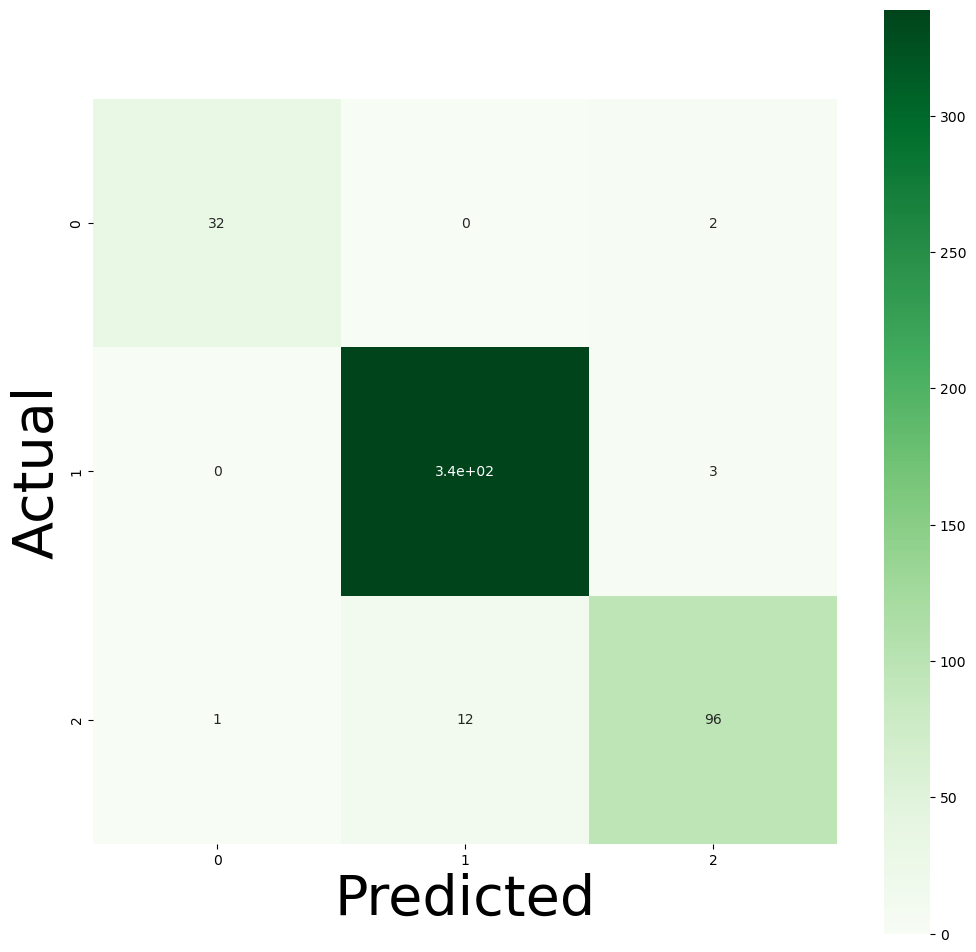

In [19]:
from sklearn.metrics import classification_report,roc_auc_score,average_precision_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
from sklearn.metrics import average_precision_score

final_loss, final_accuracy = model.evaluate(X_test, y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))
pred_st =model.predict(X_test)
pred_st = np.argmax(pred_st,axis=1)
y_eval_st = np.argmax(y_test,axis=1)
score_st = accuracy_score(y_eval_st, pred_st)
print("accuracy: {}".format(score_st))

print ("Accuracy: " + str(accuracy_score(y_eval_st, pred_st)))
print ("Precision: " + str(precision_score(y_eval_st, pred_st, average='macro')))
print ("Recall: " + str(recall_score(y_eval_st, pred_st, average='macro')))
print ("F1: " + str(f1_score(y_eval_st, pred_st, average='macro')))
#کانفیوژن ماتریکس
cm = confusion_matrix(y_eval_st, pred_st)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)
print(classification_report(y_eval_st, pred_st))

16/16 [==============================] - 1s 8ms/step - loss: 1.0542 - accuracy: 0.7010
Final Loss: 1.0541870594024658, Final Accuracy: 0.7010309100151062
16/16 [==============================] - 0s 5ms/step
accuracy: 0.7010309278350515
Accuracy: 0.7010309278350515
Precision: 0.23464458247066944
Recall: 0.3313840155945419
F1: 0.27474747474747474
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.70      0.99      0.82       342
           2       0.00      0.00      0.00       109

    accuracy                           0.70       485
   macro avg       0.23      0.33      0.27       485
weighted avg       0.50      0.70      0.58       485



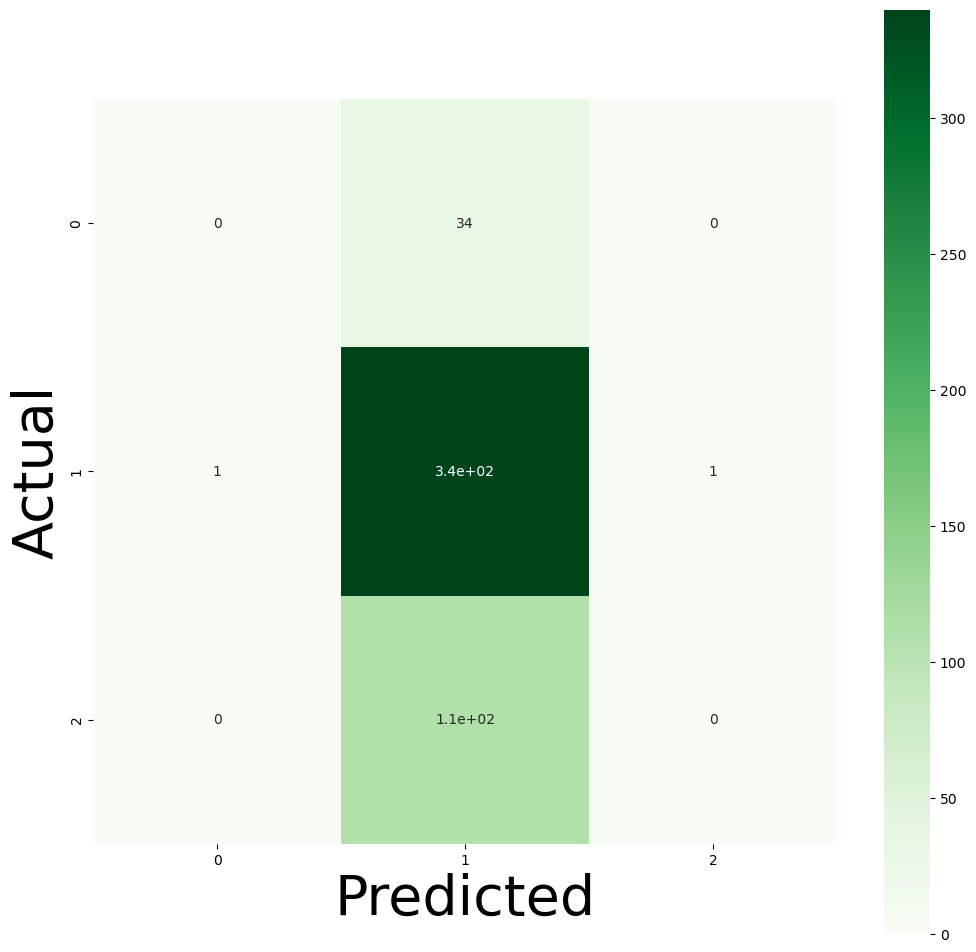

In [21]:
from sklearn.metrics import classification_report,roc_auc_score,average_precision_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
from sklearn.metrics import average_precision_score

final_loss, final_accuracy = model.evaluate(X_test, y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))
pred_st =model.predict(X_test)
pred_st = np.argmax(pred_st,axis=1)
y_eval_st = np.argmax(y_test,axis=1)
score_st = accuracy_score(y_eval_st, pred_st)
print("accuracy: {}".format(score_st))

print ("Accuracy: " + str(accuracy_score(y_eval_st, pred_st)))
print ("Precision: " + str(precision_score(y_eval_st, pred_st, average='macro')))
print ("Recall: " + str(recall_score(y_eval_st, pred_st, average='macro')))
print ("F1: " + str(f1_score(y_eval_st, pred_st, average='macro')))
#کانفیوژن ماتریکس
cm = confusion_matrix(y_eval_st, pred_st)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)
print(classification_report(y_eval_st, pred_st))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.71      1.00      0.83       342
           2       0.00      0.00      0.00       109

    accuracy                           0.71       485
   macro avg       0.24      0.33      0.28       485
weighted avg       0.50      0.71      0.58       485

Accuracy: 0.7051546391752578
Precision: 0.2350515463917526
Recall: 0.3333333333333333
F1: 0.27569528415961303


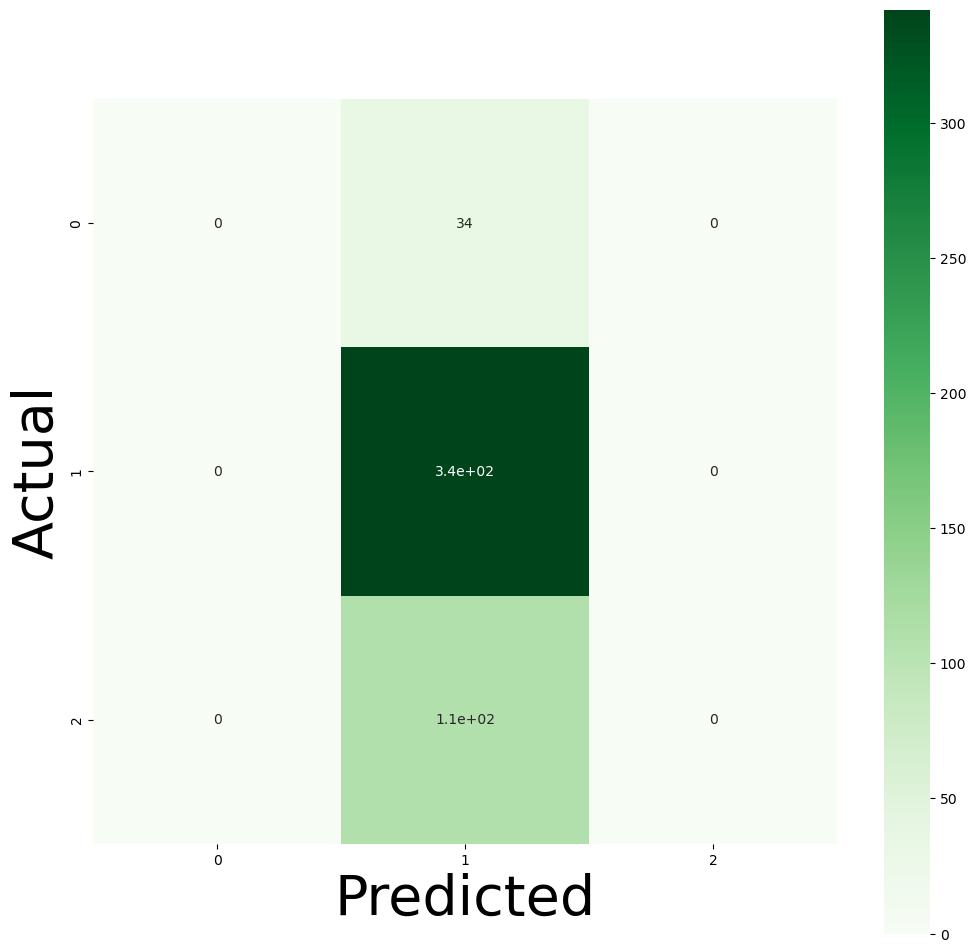

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3, random_state=42)
model.fit(X_train,  y_train)
pred_st =model.predict(X_test)
pred_st = np.argmax(pred_st,axis=1)
y_eval_st = np.argmax(y_test,axis=1)
score_st = accuracy_score(y_eval_st, pred_st)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_eval_st, pred_st)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)
print(classification_report(y_eval_st, pred_st))

print ("Accuracy: " + str(accuracy_score(y_eval_st, pred_st)))
print ("Precision: " + str(precision_score(y_eval_st, pred_st, average='macro')))
print ("Recall: " + str(recall_score(y_eval_st, pred_st, average='macro')))
print ("F1: " + str(f1_score(y_eval_st, pred_st, average='macro')))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       342
           2       0.99      1.00      1.00       109

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485

Accuracy: 0.9979381443298969
Precision: 0.9969696969696971
Recall: 0.9990253411306043
F1: 0.9979898870369999


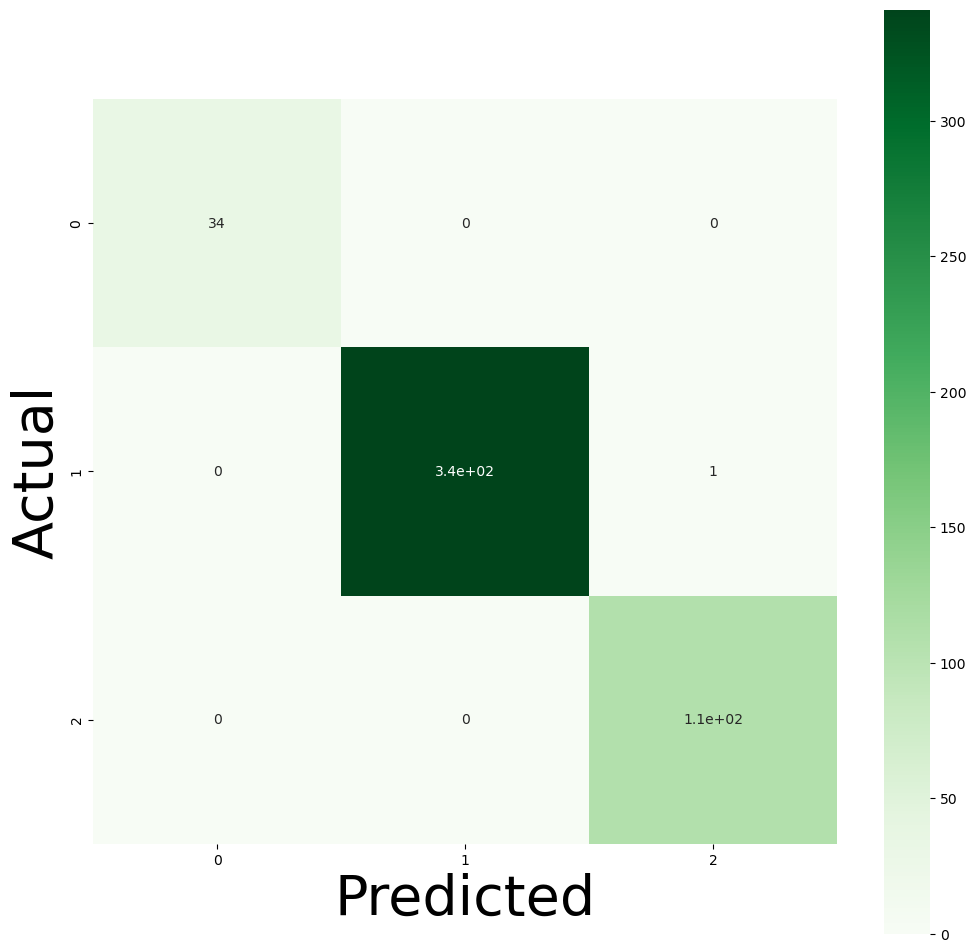

In [24]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
model.fit(X_train,  y_train)
pred_st =model.predict(X_test)
pred_st = np.argmax(pred_st,axis=1)
y_eval_st = np.argmax(y_test,axis=1)
score_st = accuracy_score(y_eval_st, pred_st)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_eval_st, pred_st)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)
print(classification_report(y_eval_st, pred_st))

print ("Accuracy: " + str(accuracy_score(y_eval_st, pred_st)))
print ("Precision: " + str(precision_score(y_eval_st, pred_st, average='macro')))
print ("Recall: " + str(recall_score(y_eval_st, pred_st, average='macro')))
print ("F1: " + str(f1_score(y_eval_st, pred_st, average='macro')))